# <u> Bank Marketing </u>

- The data is related with direct marketing campaigns *(phone calls)* of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit *(variable y)*.

----------------------------------------------------------------------------------------------------------------------------------

## <u> Input variables: </u>
### bank client data:
- age (numeric)
- job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
blue-collar","self-employed","retired","technician","services") 
- marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
- education (categorical: "unknown","secondary","primary","tertiary")
- default: has credit in default? (binary: "yes","no")
- balance: average yearly balance, in euros (numeric) 
- housing: has housing loan? (binary: "yes","no")
- loan: has personal loan? (binary: "yes","no")
### related with the last contact of the current campaign:
- contact: contact communication type (categorical: "unknown","telephone","cellular") 
- day: last contact day of the month (numeric)
- month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
- duration: last contact duration, in seconds (numeric)
### other attributes:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

## <u> Output variable (desired target): </u>
- y - has the client subscribed a term deposit? (binary: "yes","no")


In [252]:
# Import Libraries & read first 5 rows
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('bank-full.csv', sep=';')

df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# <u> Data Analysis </u>

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


##### Note:-
- Since we have no nulls then we don't need to apply any method to deal with it. Normally and depending on the situation, if there is null we can deal with it through dropping the null rows if they are not too much that it would affect the data or the nulls are are too many then we drop the whole column. Also we can deal with that through **Imputation** usually by the median of the trained data

In [254]:
# For readability we will rename the 'y' column to 'term_deposit'
df.rename(columns={'y': 'term_deposit'}, inplace=True)

In [255]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


- Above we can see that there are negative values in the <b><u>balance</u></b> column, we can deal with that by changing the sign
- The <b><u>previous</u></b> column is suspicious in the max value, so we can check for it if we can remove this for being an outlier

In [256]:
df[df['balance'] < 0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
25,44,admin.,married,secondary,no,-372,yes,no,unknown,5,may,172,1,-1,0,unknown,no
28,46,management,single,secondary,no,-246,yes,no,unknown,5,may,255,2,-1,0,unknown,no
36,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,unknown,no
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,unknown,no
45,36,admin.,single,primary,no,-171,yes,no,unknown,5,may,242,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44626,31,services,single,secondary,no,-205,no,no,cellular,1,sep,481,1,579,1,failure,yes
44629,28,blue-collar,single,secondary,no,-46,yes,no,cellular,1,sep,199,1,92,14,success,yes
44836,33,blue-collar,married,primary,no,-195,no,no,unknown,20,sep,9,1,-1,0,unknown,no
44908,48,management,divorced,tertiary,no,-130,yes,no,cellular,29,sep,110,2,61,9,failure,no


In [257]:
# Dealing with negative values in balance column
df['balance'] = df['balance'].apply(lambda x: abs(x))
df[df['balance'] < 0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit


<Axes: >

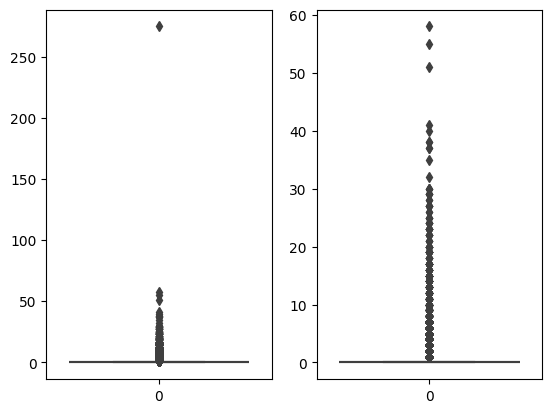

In [258]:
# Checking the outlier in previous column, by drawing we can see that there one value that is too far, we can remove it
fig, axs = plt.subplots(ncols=2)
sns.boxplot(data = df['previous'], ax = axs[0])
df = df[df['previous'] < 250]
sns.boxplot(data = df['previous'], ax=axs[1])

In [259]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,term_deposit
count,45210,45210,45210,45210,45210,45210,45210,45210,45210,45210
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27213,23202,44395,25129,37966,29284,13766,36959,39921


In [260]:
# Checking the percentage of imbalance in the target variable
df['term_deposit'].value_counts(normalize=True) * 100

term_deposit
no     88.301261
yes    11.698739
Name: proportion, dtype: float64

#### We can see from the describe above there is a lot of outliers, we can better start to check for that by drawing, we need to split the data into:
    - Categorical Data
    - Numerical Data


In [261]:
cat_cols = df.select_dtypes(include='O').columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'term_deposit'],
      dtype='object')

In [262]:
num_cols = df.select_dtypes(exclude='O').columns
num_cols

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

C:\Users\ZZ00JO865\AppData\Roaming\Python\Python312\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ZZ00JO865\AppData\Roaming\Python\Python312\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ZZ00JO865\AppData\Roaming\Python\Python312\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ZZ00JO865\AppData\Roaming\Python\Python312\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

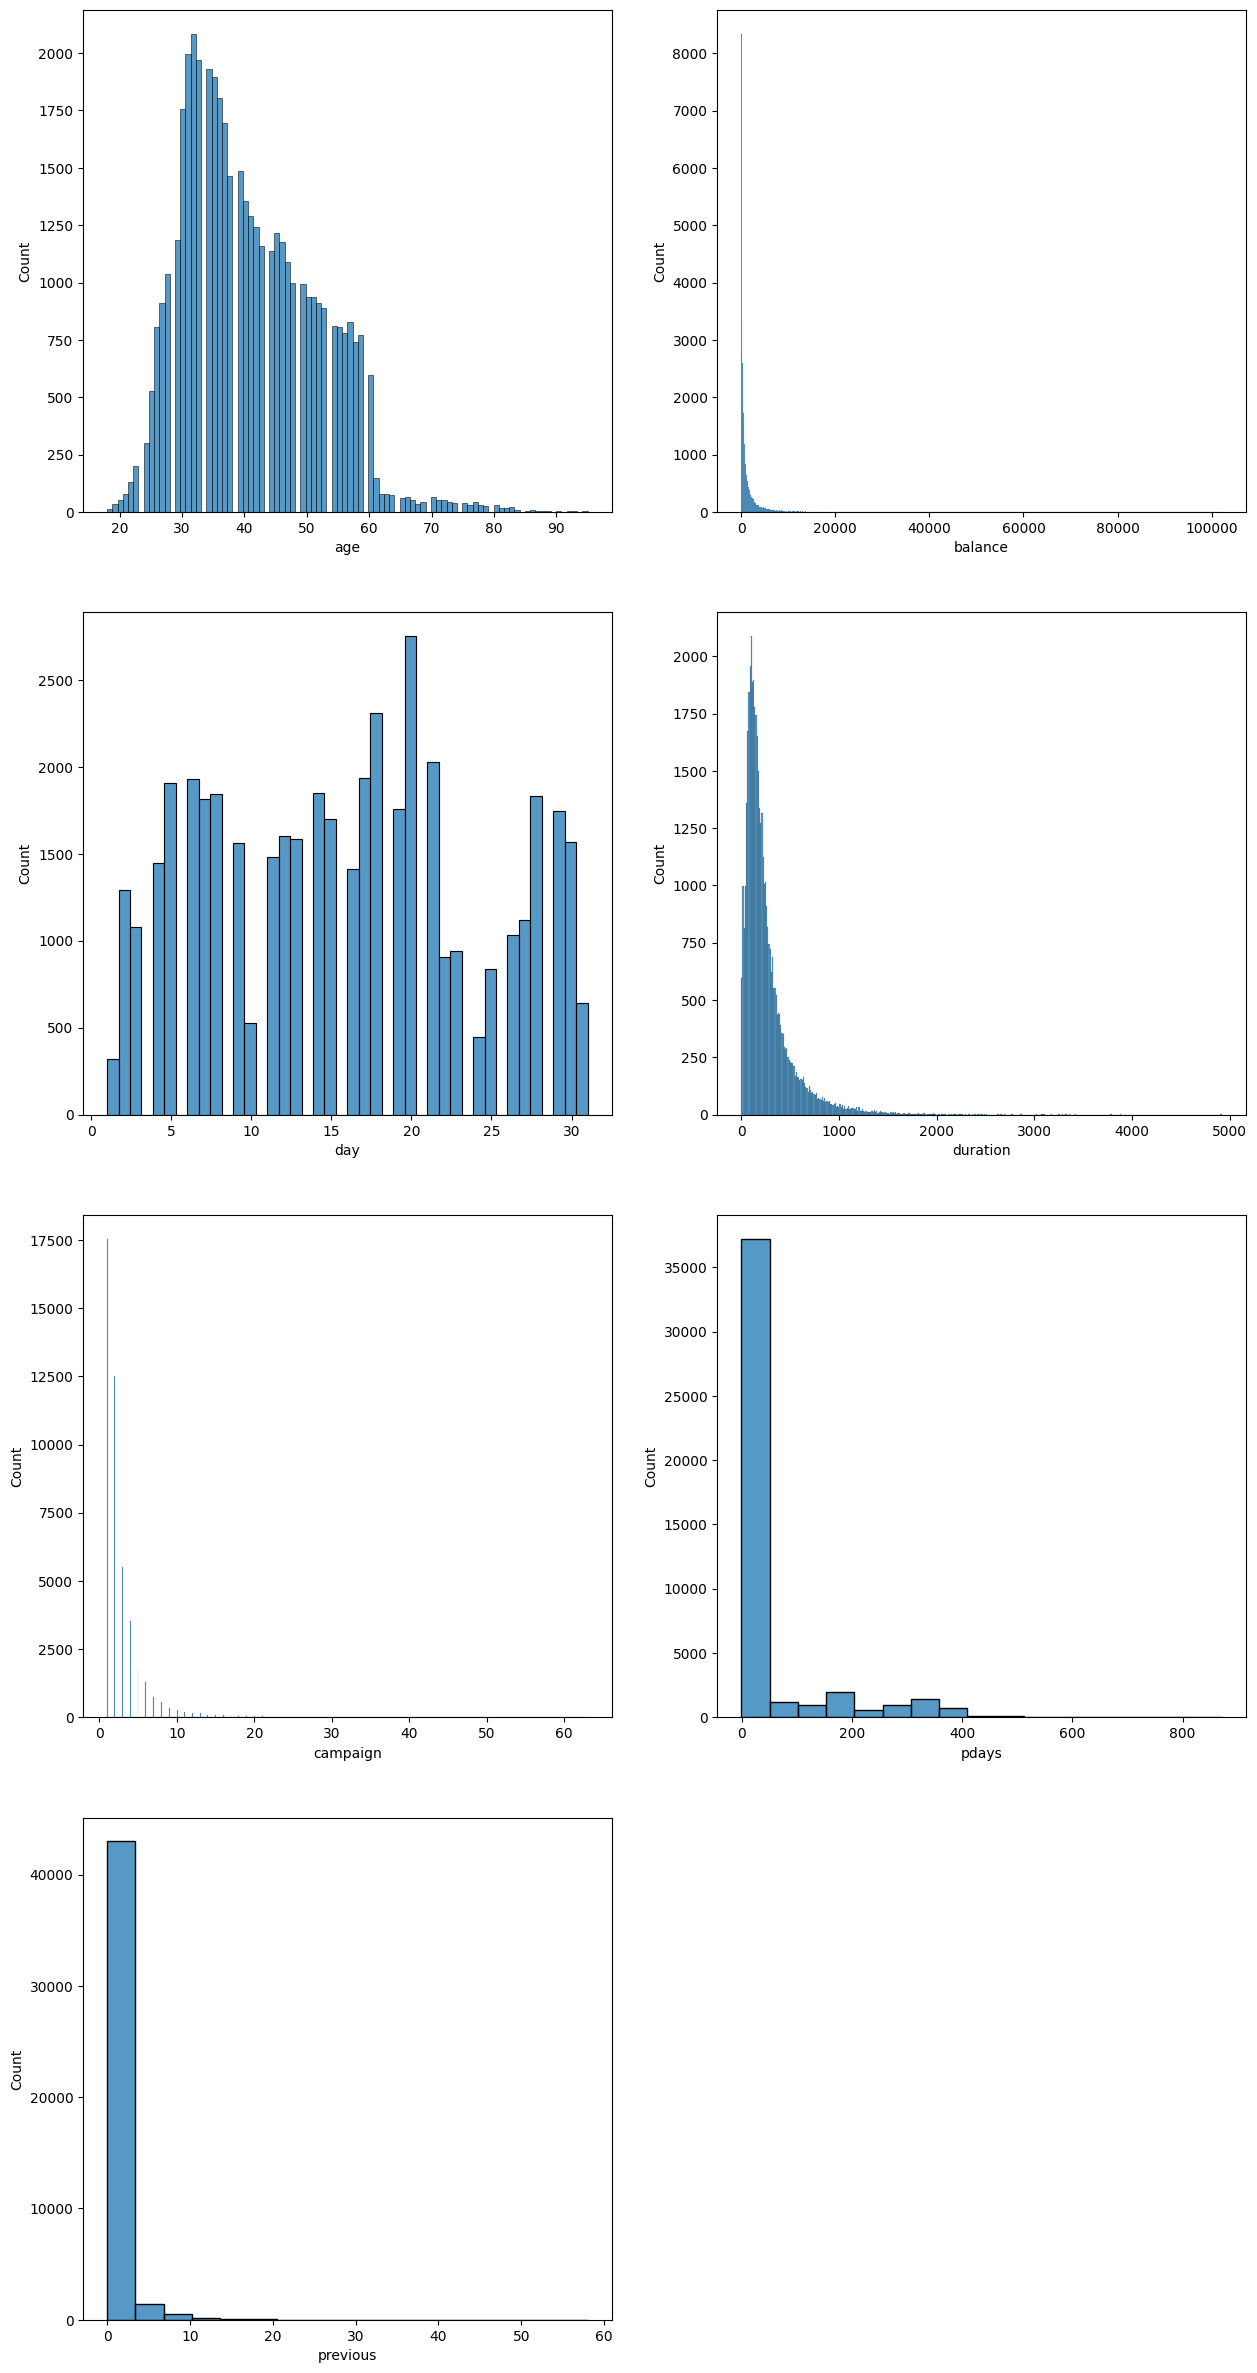

In [263]:
plt.figure(figsize=(15, 30))
for i, col in enumerate(num_cols, 1):
    plt.subplot((len(num_cols)//2 + 1), 2, i)
    sns.histplot(data=df, x=col)

C:\Users\ZZ00JO865\AppData\Roaming\Python\Python312\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ZZ00JO865\AppData\Roaming\Python\Python312\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ZZ00JO865\AppData\Roaming\Python\Python312\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ZZ00JO865\AppData\Roaming\Python\Python312\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

<Axes: xlabel='age', ylabel='Count'>

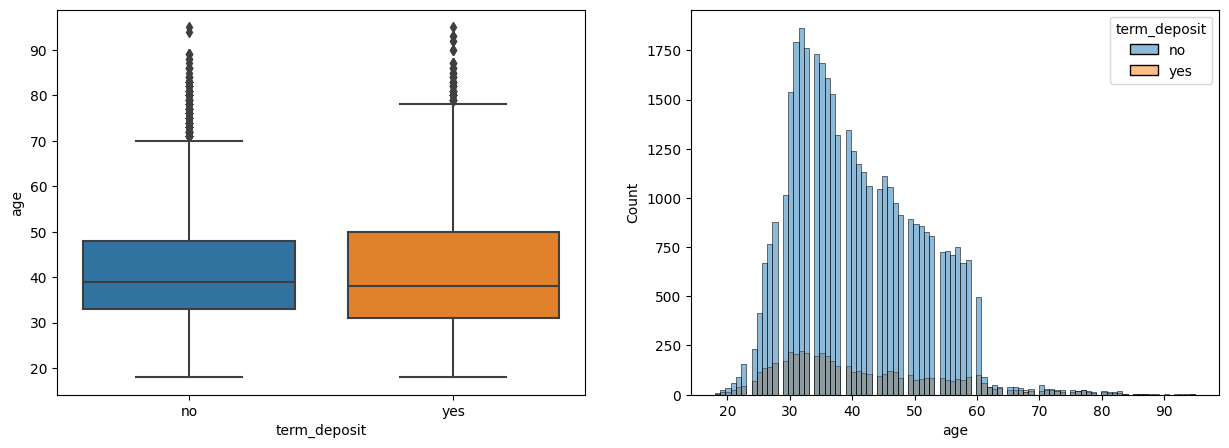

In [264]:
f, ax = plt.subplots(1, 2,  figsize = (15,5))
sns.boxplot(x = 'term_deposit', y = 'age', data=df, ax=ax[0])
sns.histplot(df, x='age', hue='term_deposit', ax=ax[1])

C:\Users\ZZ00JO865\AppData\Roaming\Python\Python312\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ZZ00JO865\AppData\Roaming\Python\Python312\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ZZ00JO865\AppData\Roaming\Python\Python312\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ZZ00JO865\AppData\Roaming\Python\Python312\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

<Axes: xlabel='day', ylabel='Count'>

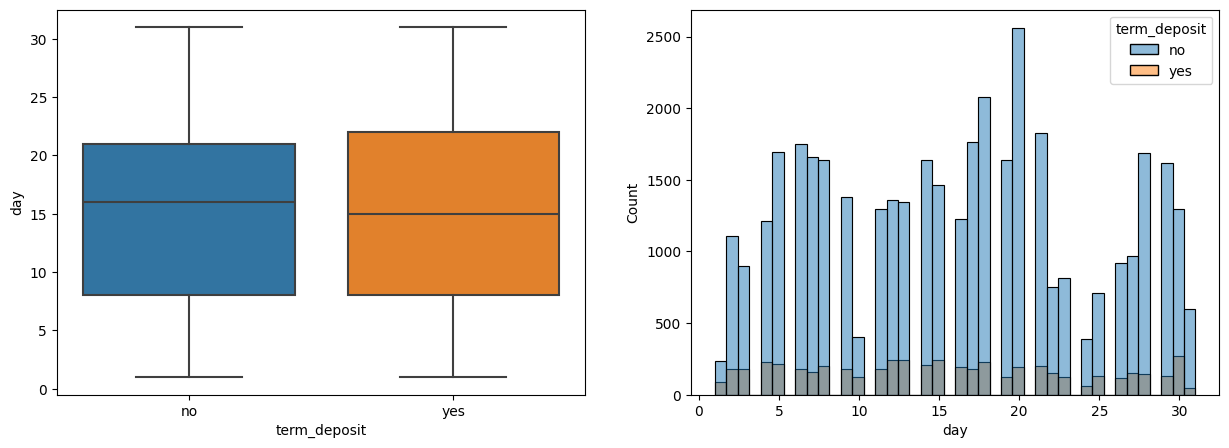

In [265]:
f, ax = plt.subplots(1, 2,  figsize = (15,5))
sns.boxplot(x='term_deposit',y='day',data=df,ax=ax[0])
sns.histplot(df, x='day', hue='term_deposit', ax=ax[1])

C:\Users\ZZ00JO865\AppData\Roaming\Python\Python312\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ZZ00JO865\AppData\Roaming\Python\Python312\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ZZ00JO865\AppData\Roaming\Python\Python312\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ZZ00JO865\AppData\Roaming\Python\Python312\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

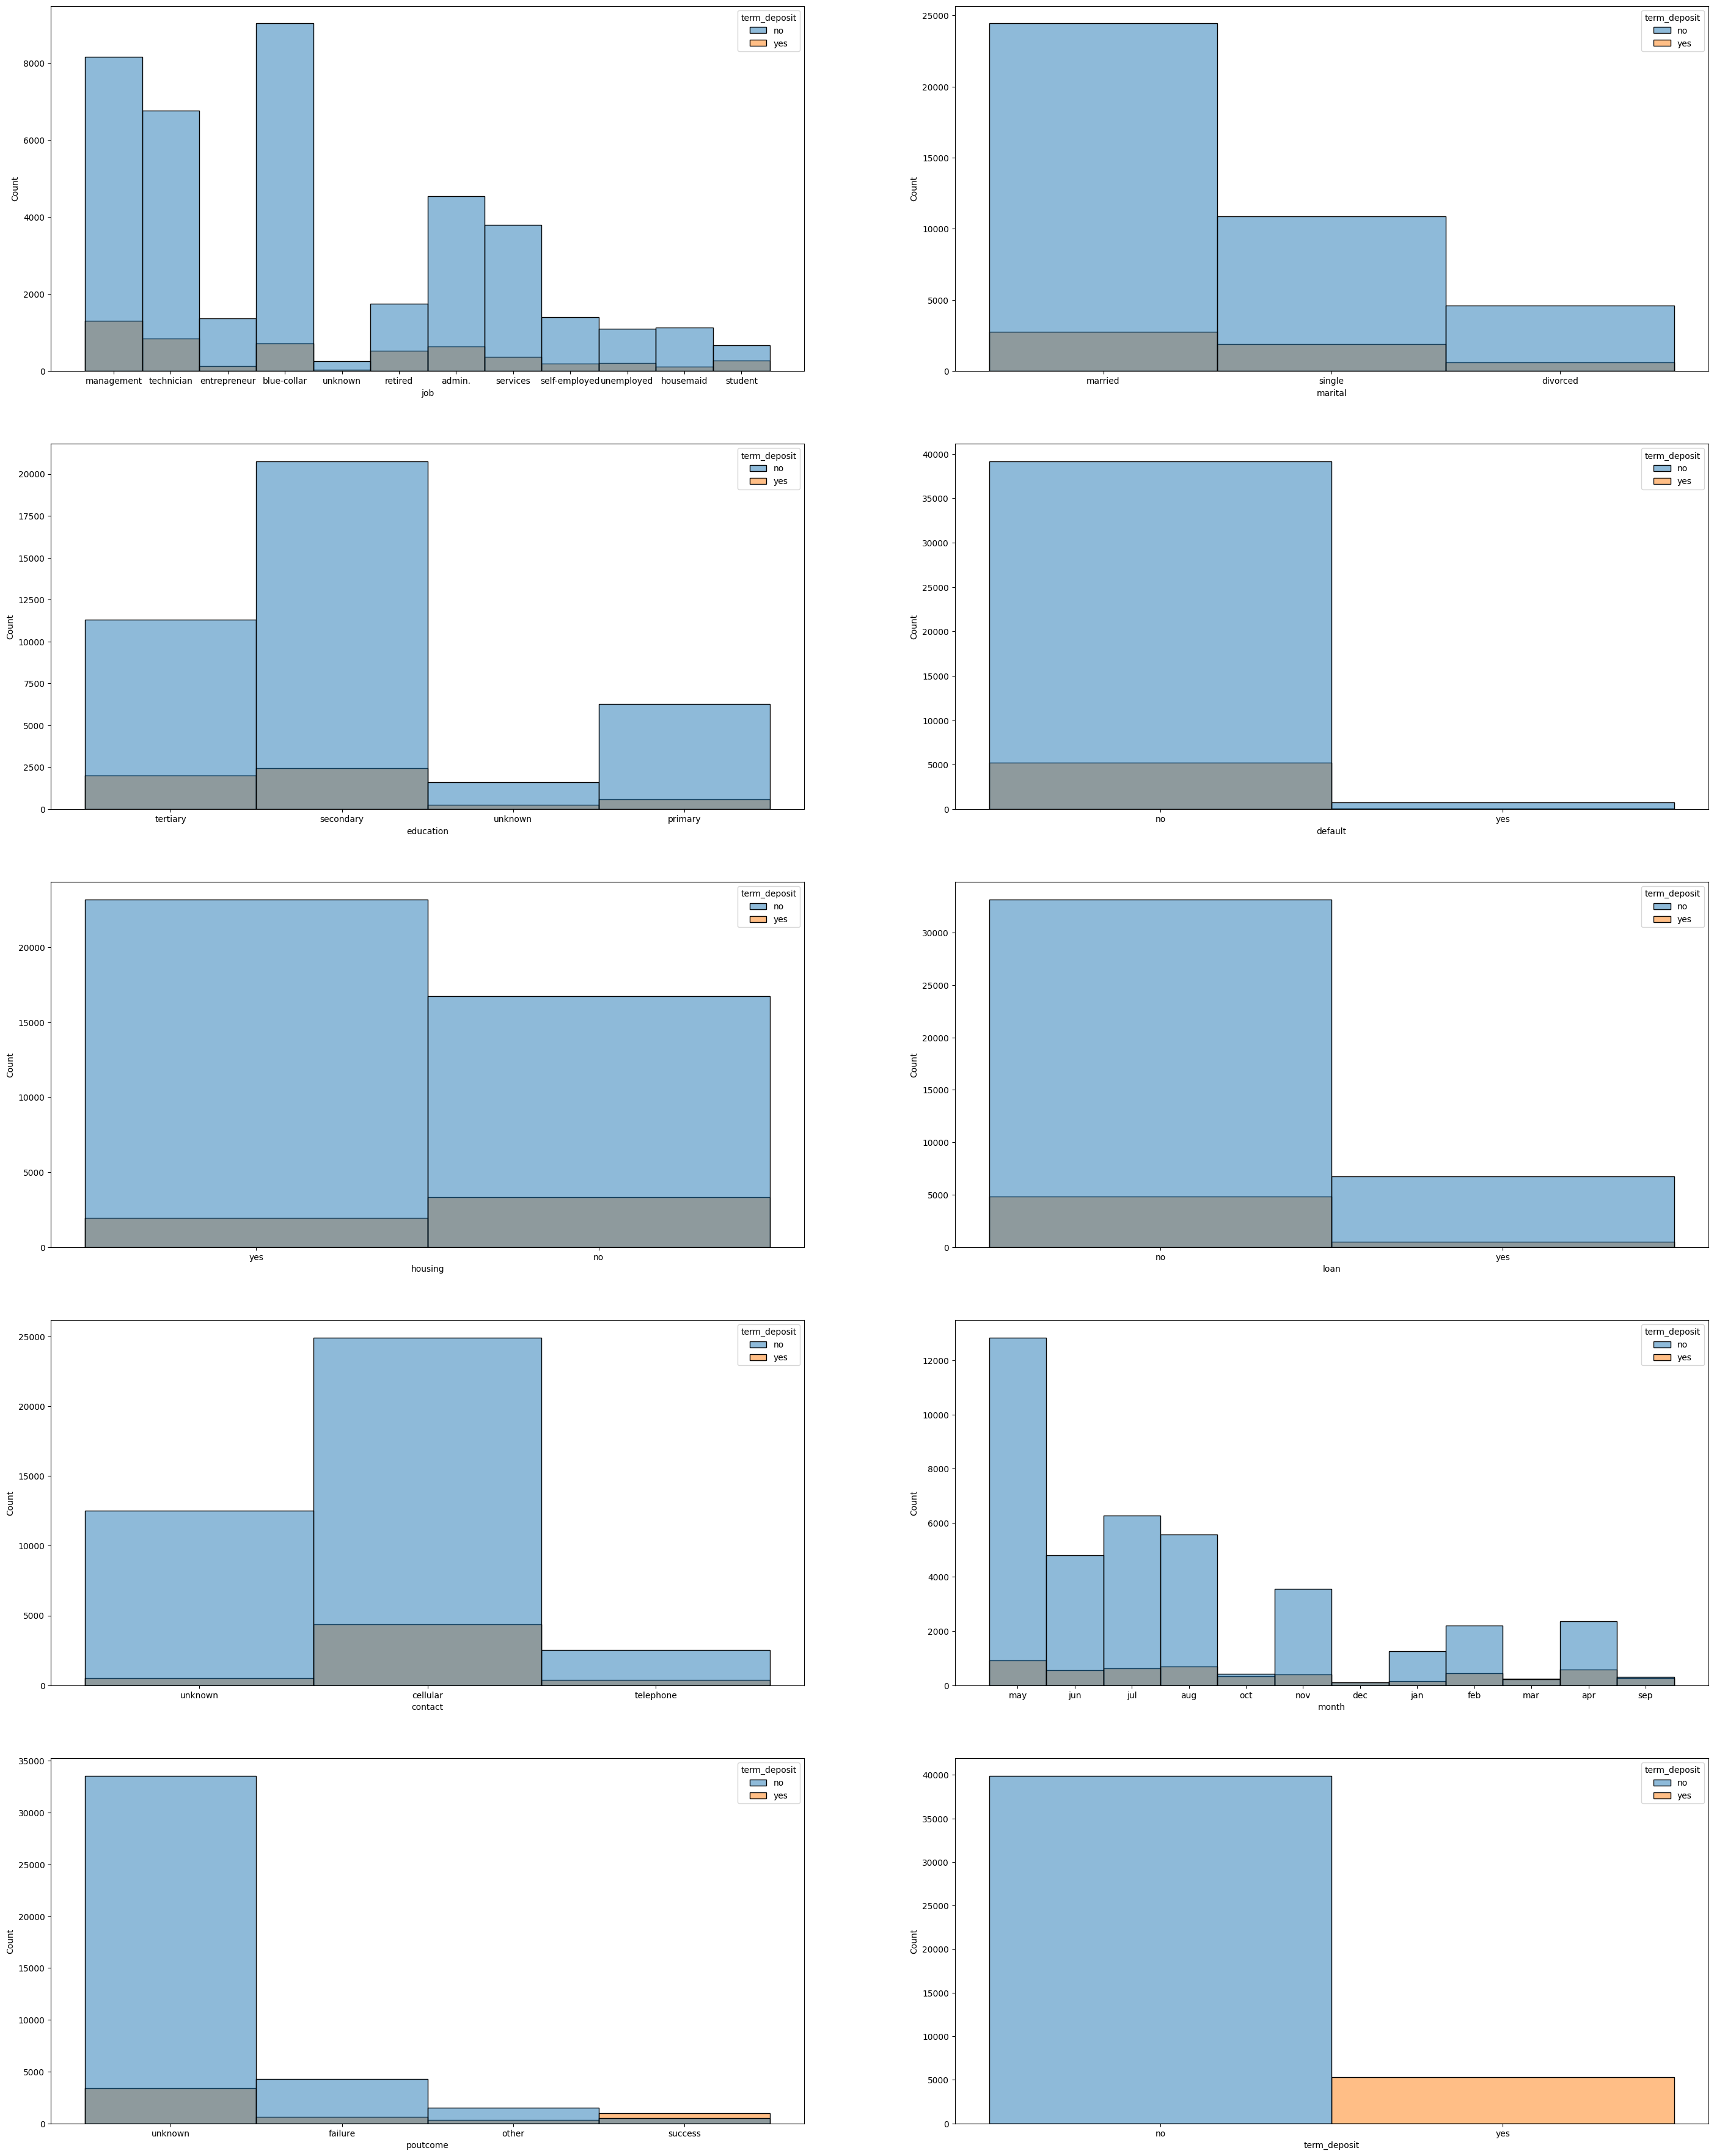

In [266]:
plt.figure(figsize = (35,45))
for i, col in enumerate(cat_cols,1):
    plt.subplot(len(cat_cols)//2, 2, i)
    sns.histplot(data = df, x = col, hue='term_deposit')

In [267]:
df['term_deposit_num'] = df['term_deposit'].apply(lambda x: 1 if x == 'yes' else 0)
num_cols_with_target = df.select_dtypes(exclude='O').columns


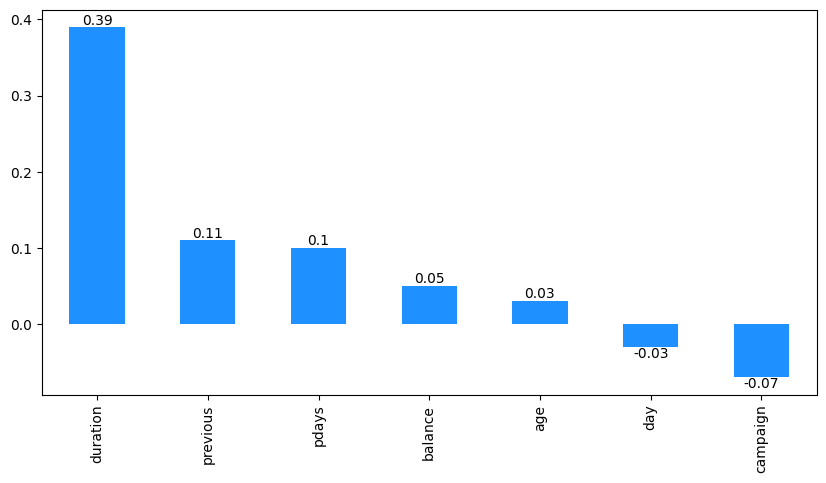

In [268]:
ax = round(df[num_cols_with_target].corr()['term_deposit_num'].sort_values(ascending=False)[1:],2).plot(kind='bar',color='dodgerblue', figsize=(10,5))
ax.bar_label(ax.containers[0])
plt.show()

-------------------------------------------

# Machine Learning

In [269]:
cat_cols = cat_cols.drop('term_deposit')

In [270]:
num_cols

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [271]:
X = df.drop('term_deposit', axis=1)
Y = df['term_deposit'].map({'yes': 1, 'no': 0})

In [272]:
df['term_deposit'].value_counts(normalize=True)

term_deposit
no     0.883013
yes    0.116987
Name: proportion, dtype: float64

In [273]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [274]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit_num
33316,43,blue-collar,married,secondary,no,701,yes,yes,cellular,20,apr,69,1,-1,0,unknown,0
43409,24,student,single,secondary,no,4126,no,no,cellular,5,apr,907,4,185,7,failure,1
20669,44,technician,single,secondary,no,244,yes,no,cellular,12,aug,1735,4,-1,0,unknown,1
18810,48,unemployed,married,secondary,no,0,no,no,telephone,31,jul,35,11,-1,0,unknown,0
23130,38,technician,married,secondary,no,257,no,no,cellular,26,aug,57,10,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6655,41,management,married,primary,no,679,yes,yes,unknown,28,may,209,2,-1,0,unknown,0
15941,36,admin.,single,secondary,no,22,yes,no,cellular,22,jul,77,5,-1,0,unknown,0
36766,31,blue-collar,married,secondary,no,1908,no,no,cellular,12,may,225,1,-1,0,unknown,0
34781,27,management,single,tertiary,no,2559,yes,no,cellular,6,may,227,1,-1,0,unknown,0


In [275]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler

enc = OneHotEncoder(handle_unknown='ignore')
sc = RobustScaler()

ct = ColumnTransformer([
    ('encoding', enc, cat_cols),
    ('scaling', sc, num_cols)
])

ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [276]:
list(ct.get_feature_names_out())

['encoding__job_admin.',
 'encoding__job_blue-collar',
 'encoding__job_entrepreneur',
 'encoding__job_housemaid',
 'encoding__job_management',
 'encoding__job_retired',
 'encoding__job_self-employed',
 'encoding__job_services',
 'encoding__job_student',
 'encoding__job_technician',
 'encoding__job_unemployed',
 'encoding__job_unknown',
 'encoding__marital_divorced',
 'encoding__marital_married',
 'encoding__marital_single',
 'encoding__education_primary',
 'encoding__education_secondary',
 'encoding__education_tertiary',
 'encoding__education_unknown',
 'encoding__default_no',
 'encoding__default_yes',
 'encoding__housing_no',
 'encoding__housing_yes',
 'encoding__loan_no',
 'encoding__loan_yes',
 'encoding__contact_cellular',
 'encoding__contact_telephone',
 'encoding__contact_unknown',
 'encoding__month_apr',
 'encoding__month_aug',
 'encoding__month_dec',
 'encoding__month_feb',
 'encoding__month_jan',
 'encoding__month_jul',
 'encoding__month_jun',
 'encoding__month_mar',
 'encodin

In [277]:
# Here we can create a function that plots the top affecting features
def feature_weights(classifier, classifier_name):
    weights = (pd.Series(classifier.coef_[0],index=list(ct.get_feature_names_out()))).sort_values()
    plt.figure(figsize=(30,15))
    plt.tick_params(labelsize=10)
    plt.title(f'{classifier_name} - Features')
    ax = weights.plot(kind='bar')
    ax.bar_label(ax.containers[0]) 

In [278]:
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7984
           1       0.65      0.34      0.44      1058

    accuracy                           0.90      9042
   macro avg       0.79      0.66      0.69      9042
weighted avg       0.89      0.90      0.89      9042



C:\Users\ZZ00JO865\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


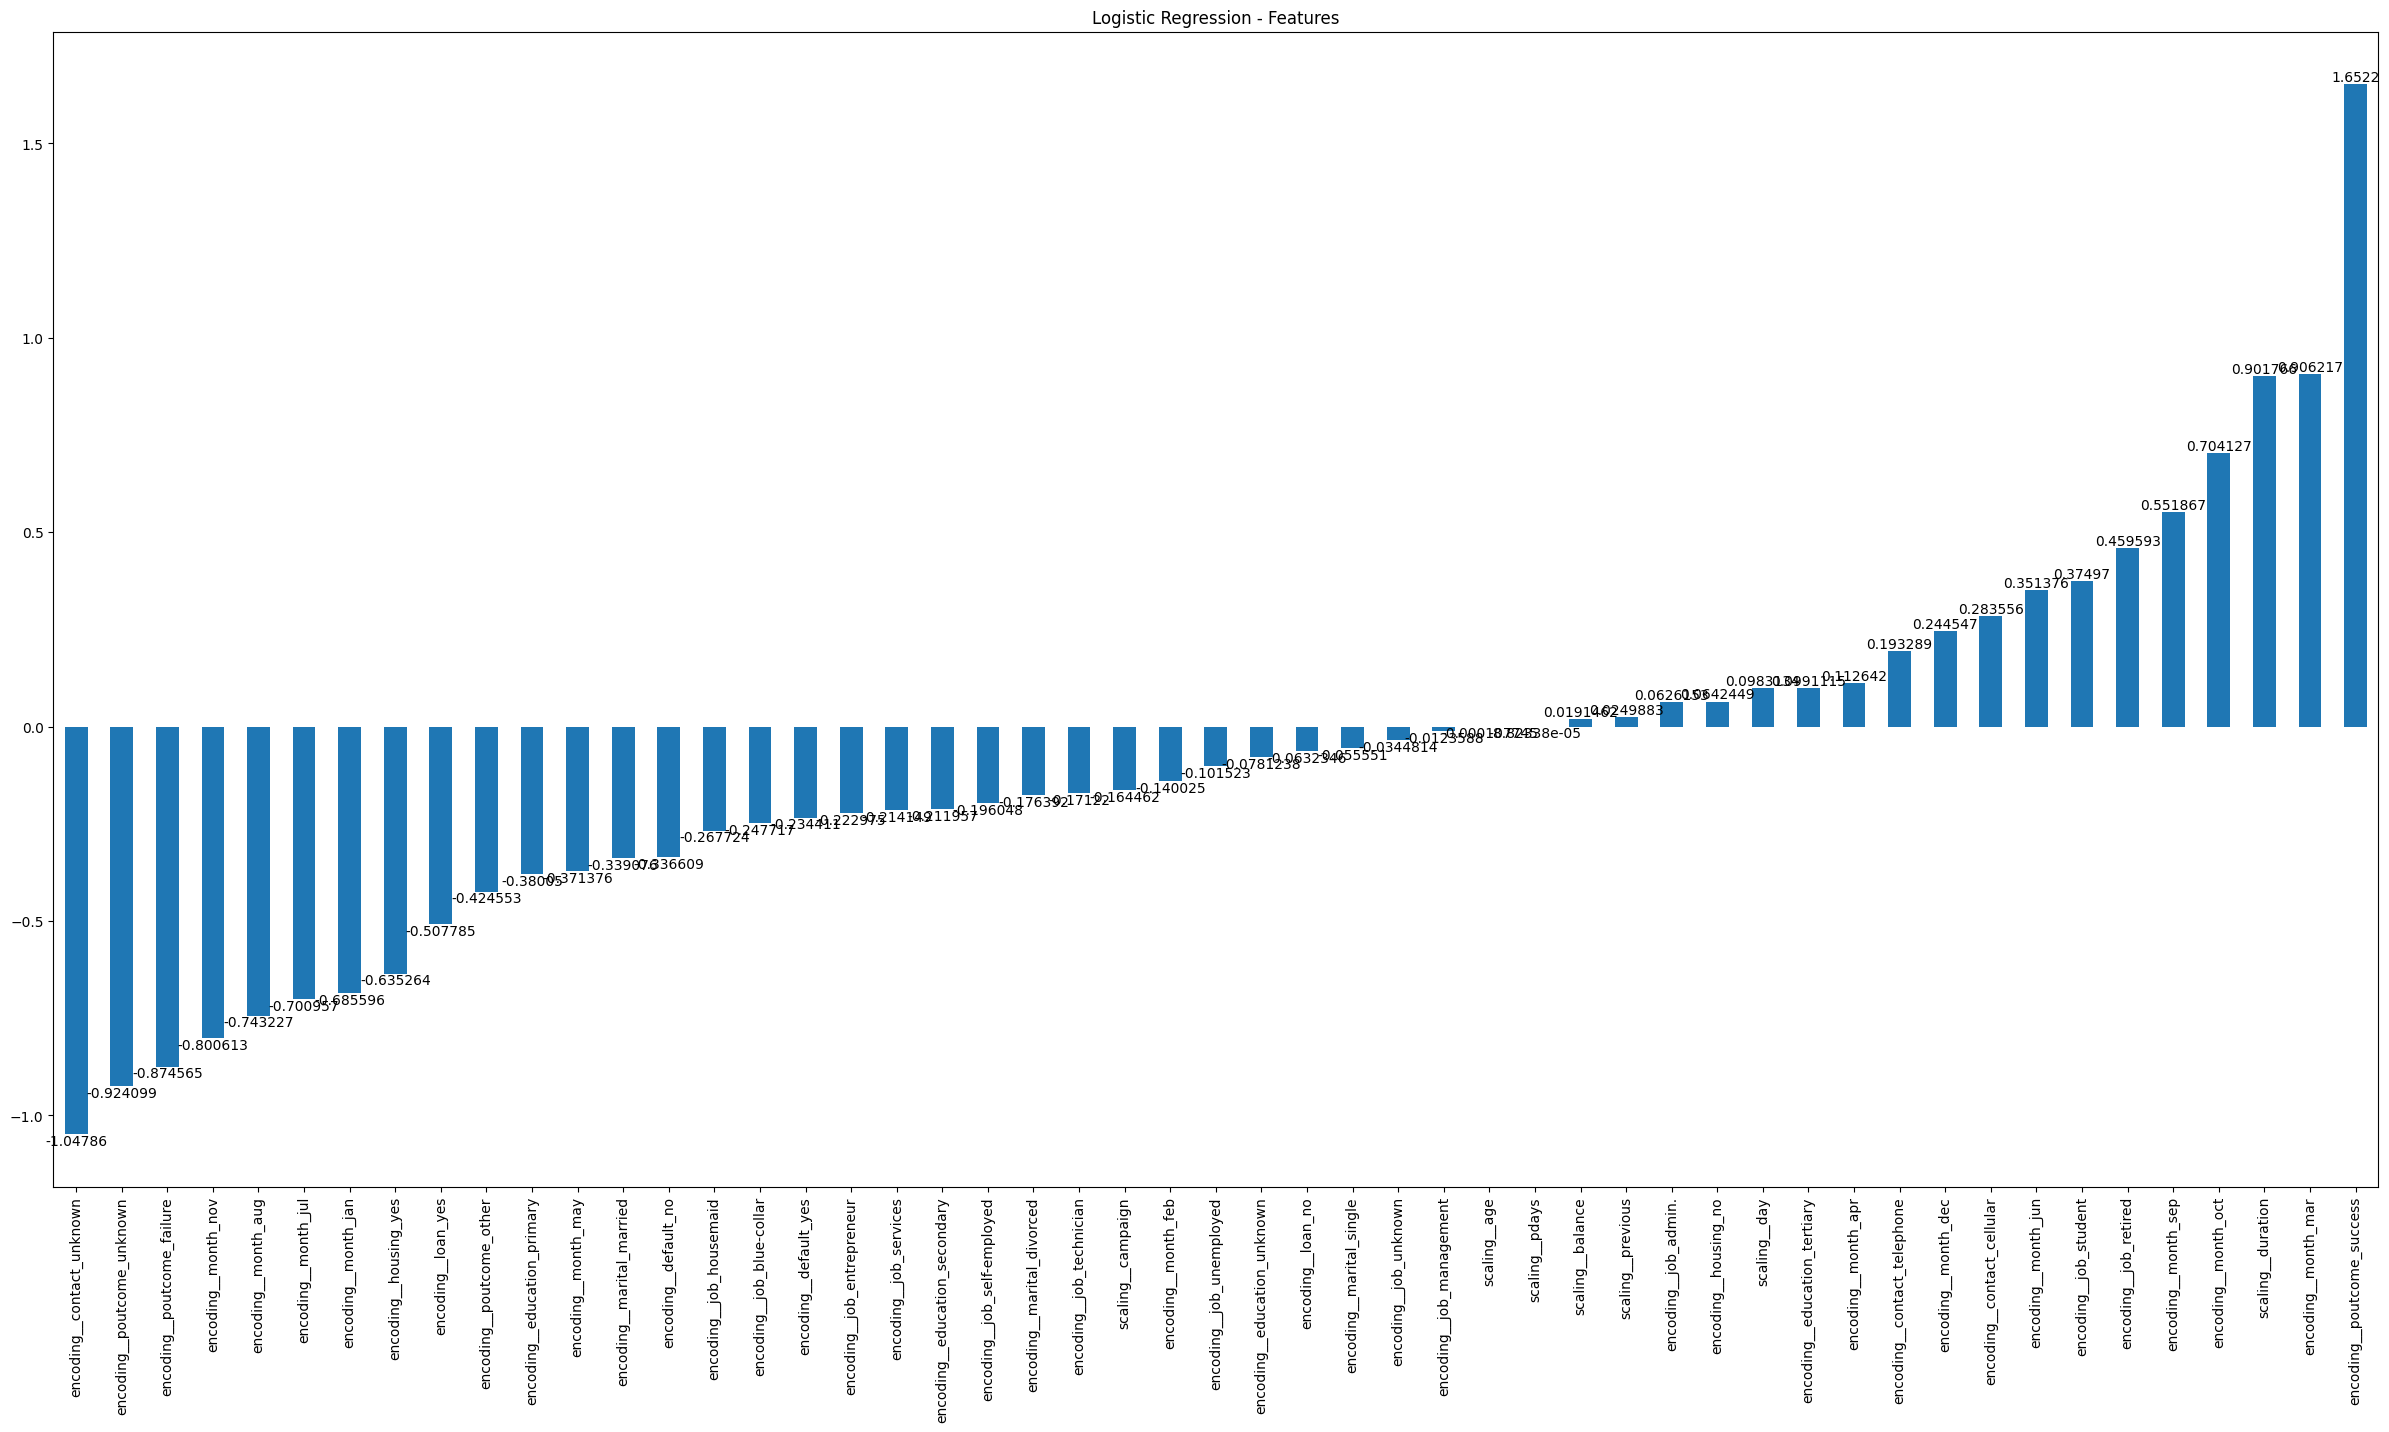

In [279]:
feature_weights(lr, 'Logistic Regression')

- One way we can try is to use the 'balanced' parameter in the Logistic Regression and see what we can get

In [280]:
lr2 = LogisticRegression(random_state=0, class_weight='balanced')
lr2.fit(X_train,y_train)
y_pred = lr2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.85      0.90      7984
           1       0.41      0.82      0.55      1058

    accuracy                           0.84      9042
   macro avg       0.69      0.83      0.73      9042
weighted avg       0.91      0.84      0.86      9042



C:\Users\ZZ00JO865\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [281]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7984
           1       0.48      0.47      0.48      1058

    accuracy                           0.88      9042
   macro avg       0.71      0.70      0.70      9042
weighted avg       0.88      0.88      0.88      9042



In [283]:
from sklearn.ensemble import GradientBoostingClassifier
xg = GradientBoostingClassifier(learning_rate=0.01, n_estimators=400, max_depth=13)
xg.fit(X_train, y_train)
print('Gradient Boosting Score: ', xg.score(X_test, y_test))
print('-----------------------------------------------------------')
y_pred = xg.predict(X_test)
print(classification_report(y_test, y_pred))


- Here we can try to use *Synthetic Minority Oversampling Technique* (SMOTE)

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 31937), (1, 31937)]


In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb

xgb = XGBClassifier(subsample=0.7, reg_lambda=0.3, n_estimators=1000,
                              min_child_weight=0.3, max_depth=7, learning_rate=0.05,
                              gamma=1, colsample_bytree=0.7
                            )
xgb.fit(X_resampled, y_resampled)

y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.91      7984
           1       0.42      0.89      0.57      1058

    accuracy                           0.85      9042
   macro avg       0.70      0.86      0.74      9042
weighted avg       0.92      0.85      0.87      9042



In [ ]:
lr.fit(X_resampled, y_resampled)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      7984
           1       0.41      0.81      0.54      1058

    accuracy                           0.84      9042
   macro avg       0.69      0.83      0.72      9042
weighted avg       0.91      0.84      0.86      9042



C:\Users\ZZ00JO865\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
rf.fit(X_resampled, y_resampled)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7984
           1       0.60      0.53      0.56      1058

    accuracy                           0.90      9042
   macro avg       0.77      0.74      0.75      9042
weighted avg       0.90      0.90      0.90      9042



In [ ]:
xg.fit(X_resampled, y_resampled)
print('XGBoost Score: ', xg.score(X_test, y_test))
print('-----------------------------------------------------------')
y_pred = xg.predict(X_test)
print(classification_report(y_test, y_pred))

XGBoost Score:  0.8992479539924796
-----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7984
           1       0.56      0.64      0.60      1058

    accuracy                           0.90      9042
   macro avg       0.76      0.79      0.77      9042
weighted avg       0.91      0.90      0.90      9042



- And we also can try to use Under Sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
print("Resampled class distribution:", Counter(y_resampled))


Resampled class distribution: Counter({0: 4231, 1: 4231})


In [ ]:
lr.fit(X_resampled, y_resampled)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      7984
           1       0.40      0.82      0.54      1058

    accuracy                           0.84      9042
   macro avg       0.69      0.83      0.72      9042
weighted avg       0.91      0.84      0.86      9042



C:\Users\ZZ00JO865\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
rf.fit(X_resampled, y_resampled)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      7984
           1       0.40      0.89      0.56      1058

    accuracy                           0.83      9042
   macro avg       0.69      0.86      0.73      9042
weighted avg       0.91      0.83      0.86      9042



In [ ]:
from imblearn.pipeline import Pipeline
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler()
steps = [('over', over), ('under', under)]
pipeline = Pipeline(steps=steps)
x_pipe, y_pipe = pipeline.fit_resample(X_train, y_train)
Counter(y_pipe)

Counter({0: 15968, 1: 15968})

In [ ]:
lr.fit(x_pipe, y_pipe)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.85      0.90      7984
           1       0.41      0.80      0.54      1058

    accuracy                           0.84      9042
   macro avg       0.69      0.82      0.72      9042
weighted avg       0.90      0.84      0.86      9042



C:\Users\ZZ00JO865\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
dt.fit(x_pipe, y_pipe)
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      7984
           1       0.42      0.62      0.50      1058

    accuracy                           0.86      9042
   macro avg       0.68      0.75      0.71      9042
weighted avg       0.88      0.86      0.87      9042



In [ ]:
rf.fit(x_pipe, y_pipe)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      7984
           1       0.54      0.71      0.61      1058

    accuracy                           0.89      9042
   macro avg       0.75      0.82      0.78      9042
weighted avg       0.91      0.89      0.90      9042



In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

brf = BalancedRandomForestClassifier()
brf.fit(X_train, y_train)
y_pred = brf.predict(X_test)
print(classification_report(y_test, y_pred))

C:\Users\ZZ00JO865\AppData\Roaming\Python\Python312\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\ZZ00JO865\AppData\Roaming\Python\Python312\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\ZZ00JO865\AppData\Roaming\Python\Python312\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silenc

              precision    recall  f1-score   support

           0       0.98      0.82      0.90      7984
           1       0.40      0.90      0.55      1058

    accuracy                           0.83      9042
   macro avg       0.69      0.86      0.73      9042
weighted avg       0.92      0.83      0.86      9042



In [ ]:
import xgboost as xgb

clf = xgb.XGBClassifier(objective='multi:softmax', num_class=2, max_depth=5, learning_rate=0.0001, n_estimators=800, random_state=42)
clf.fit(X_train, y_train)
print('XGBoost Score: ', clf.score(X_test, y_test))
print('-----------------------------------------------------------')
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))



XGBoost Score:  0.8993585489935855
-----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7984
           1       0.65      0.31      0.42      1058

    accuracy                           0.90      9042
   macro avg       0.78      0.64      0.68      9042
weighted avg       0.88      0.90      0.88      9042



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7984
           1       0.67      0.40      0.50      1058

    accuracy                           0.91      9042
   macro avg       0.80      0.69      0.73      9042
weighted avg       0.90      0.91      0.90      9042



* We can see above that the RandomForestClassifier has more

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10, 
                                    max_features="log2", 
                                    max_leaf_nodes=13, 
                                    n_estimators=50,
                                    random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7984
           1       0.88      0.09      0.17      1058

    accuracy                           0.89      9042
   macro avg       0.88      0.55      0.55      9042
weighted avg       0.89      0.89      0.85      9042



### Save the current dataframe in a new CSV

In [251]:
df.to_csv('bank-final.csv', index=False)

In [ ]:
import pickle

# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))